In [1]:
# Import basic packages for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import selected model for classification (the problem is about binary classification)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
# Packages for data training, model selection + evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
data = pd.read_csv('creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Data includes nearly 300k samples and 31 columns (both dependant var and independent ones)
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
"""
The 'Class' column = response variable, while the other 30 cols act as feature for prediction model
Based on stats described, except for 'Time' and 'Amount' columns, the rest features looks like being transformed/normalized by a specific method (such as PCA)
"""
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [48]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Check the actual result of class
"""
0 = no fraud, 1 = fraud
ratio between fraud and non-fraud: 492/284315 (~0.002)
Hence, the sample seems extremely unbalanced
"""
data.groupby('Class').Class.count()

Class
0    284315
1       492
Name: Class, dtype: int64

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

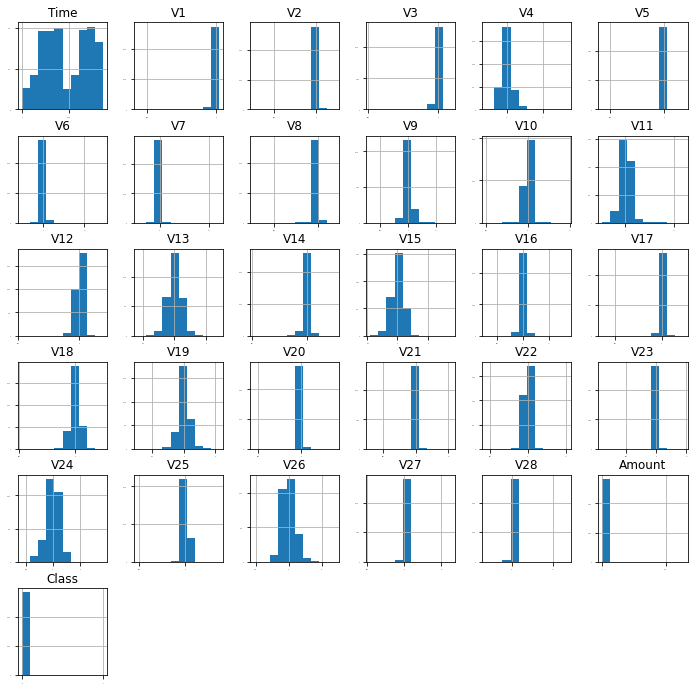

In [23]:
# Distribution of all metrics in data
data.hist(xlabelsize=1, ylabelsize=1, figsize=(12,12))

In [30]:
# Since the data is unbalanced, the approach is to balance the sample to avoid any possible biasness by random sampling non-fraud cases
fraud_sample = data[data['Class'] == 1]
non_fraud_sample = data[data['Class'] == 0].sample(n=fraud_sample.shape[], random_state=1)

In [34]:
print('Shape of non-fraud sample: ' , non_fraud_sample.shape)
print('Shape of fraud sample: ' , fraud_sample.shape)

Shape of non-fraud sample:  (492, 31)
Shape of fraud sample:  (492, 31)


In [50]:
sample_data = pd.concat([fraud_sample, non_fraud_sample]).sample(frac=1, random_state=96)
Y_train = sample_data['Class']
X_train = sample_data.loc[:, sample_data.columns != 'Class']

In [51]:
print('Shape of X_train: ' , X_train.shape)
print('Shape of Y_train: ' , Y_train.shape)

Shape of X_train:  (984, 30)
Shape of Y_train:  (984,)


In [52]:
# spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [53]:
num_folds = 10
seeds = 7
score = 'accuracy'
results = []
names = []

for name, model in models:
    k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=seeds)
    cv = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=score, error_score='raise')
    results.append(cv)
    names.append(name)
    a = (name, cv.mean(), cv.std())
    print(a)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

('LR', 0.9441558441558442, 0.02724540703413151)
('KNN', 0.65439084724799, 0.049460965219145496)
('CART', 0.9105957534528966, 0.02549416360699502)
('NN', 0.535446299732014, 0.05744814493696843)
('AB', 0.9410636982065552, 0.023928352985232097)
('GBM', 0.9390434961863534, 0.022217268882287595)
('RF', 0.9461863533292105, 0.02302081142645465)
('ET', 0.941125541125541, 0.021980873507391207)


Text(0.5, 1.0, 'Model Accuracy')

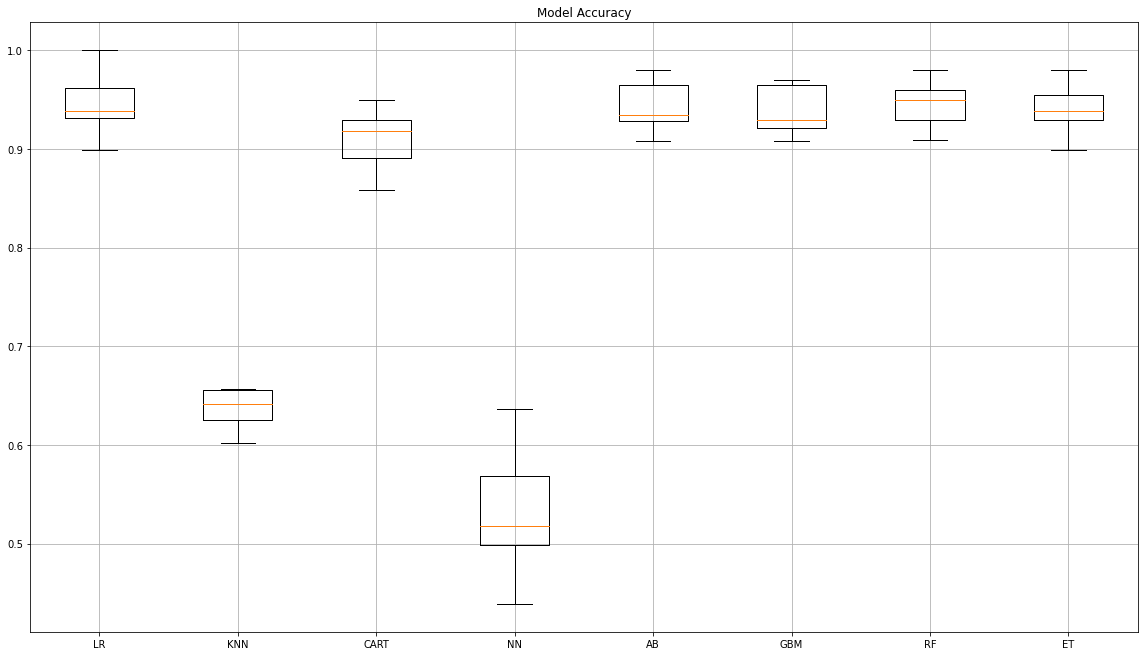

In [61]:
plt.figure(figsize=(16,9))

plt.boxplot(results, showfliers= False)

plt.xticks(np.arange(1,9,1), labels=names)
plt.grid()
plt.tight_layout()
plt.title('Model Accuracy')

In [65]:
chosen_model = ExtraTreesClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=121)
grid = GridSearchCV(estimator=chosen_model, 
                    param_grid={'n_estimators': [10, 20, 30, 50, 75, 100, 200, 500, 1000], 'max_depth': [2, 3, 5, 10, 20, 50, 75, 100, 500]},
                    scoring = 'accuracy', cv=kfold)
grid_fit = grid.fit(X_train, Y_train)
print(grid_fit.best_params_)

{'max_depth': 20, 'n_estimators': 100}


In [67]:
X_train_old, X_test, Y_train_old, Y_test = train_test_split(data.loc[:, data.columns != 'Class'], 
                                                            data['Class'], 
                                                            test_size= 0.2, 
                                                            random_state= 101)
final_model = ExtraTreesClassifier(n_estimators=grid_fit.best_params_['n_estimators'], 
                                    max_depth=grid_fit.best_params_['max_depth'])
final_model.fit(X_train, Y_train)

predictions = final_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.980618658052737
[[55755  1104]
 [    0   103]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56859
           1       0.09      1.00      0.16       103

    accuracy                           0.98     56962
   macro avg       0.54      0.99      0.57     56962
weighted avg       1.00      0.98      0.99     56962



<AxesSubplot:>

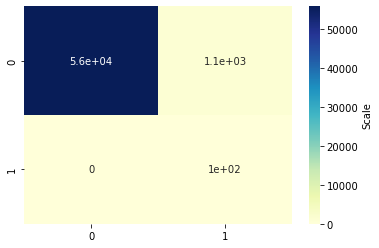

In [69]:
sns.heatmap(data=confusion_matrix(Y_test, predictions), annot = True, cmap='YlGnBu', cbar_kws={'label': 'Scale'})